In [1]:
#These libraries are used for data manipulation
import pandas as pd
import numpy as np

In [2]:
#These libraries are used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#These is to make the visualization show in the jupyter notebook rather than in another tab
%matplotlib inline 

In [3]:
# This reads the file
houses = pd.read_csv('USA_housing.csv')

Introduction to Machine Learning

In [4]:
houses.head() #prints the first 5 rows

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
#houses.tail() #prints the last 5 rows

In [6]:
houses.info() #checks for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
#to check for a particular column
#.fillna('2') fills every empty row in the column with string 2
houses["Avg. Area House Age"].fillna('2')

0       5.682861
1       6.002900
2       5.865890
3       7.188236
4       5.040555
          ...   
4995    7.830362
4996    6.999135
4997    7.250591
4998    5.534388
4999    5.992305
Name: Avg. Area House Age, Length: 5000, dtype: float64

In [8]:
#Check the summary statistics of the numeric columns
houses.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### **Price** is the target

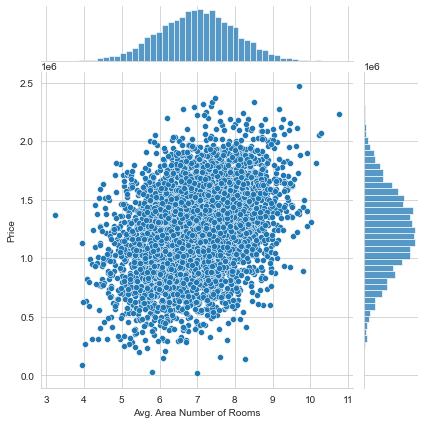

In [9]:
#using visualization to compare the "Avg. Area Number of rooms" with "Price"
sns.set_style('whitegrid')
sns.jointplot(x='Avg. Area Number of Rooms', y='Price', data=houses)

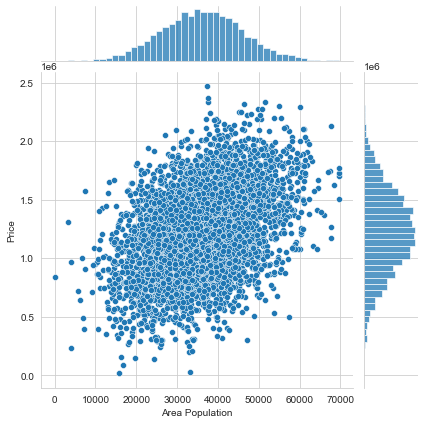

In [10]:
#comparing the area population with the Price to check for correlation betwwen them
sns.jointplot(x='Area Population', y='Price', data=houses)

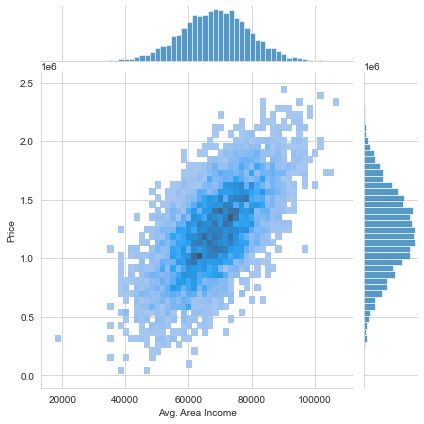

In [11]:
#comparing "Avg. Area Income" with the "Price"
sns.jointplot(x='Avg. Area Income', y='Price', kind='hist', data=houses)

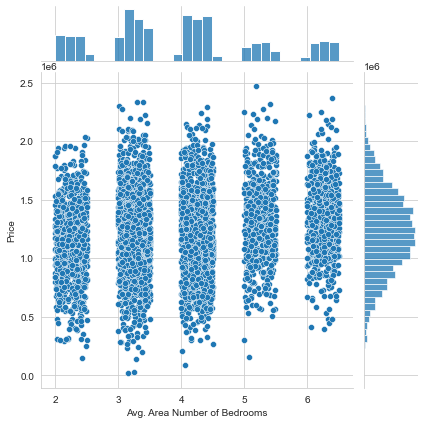

In [12]:
#comparing "Avg. Area Number of Bedrooms" with the "Price"
sns.jointplot(x='Avg. Area Number of Bedrooms', y='Price', data=houses)

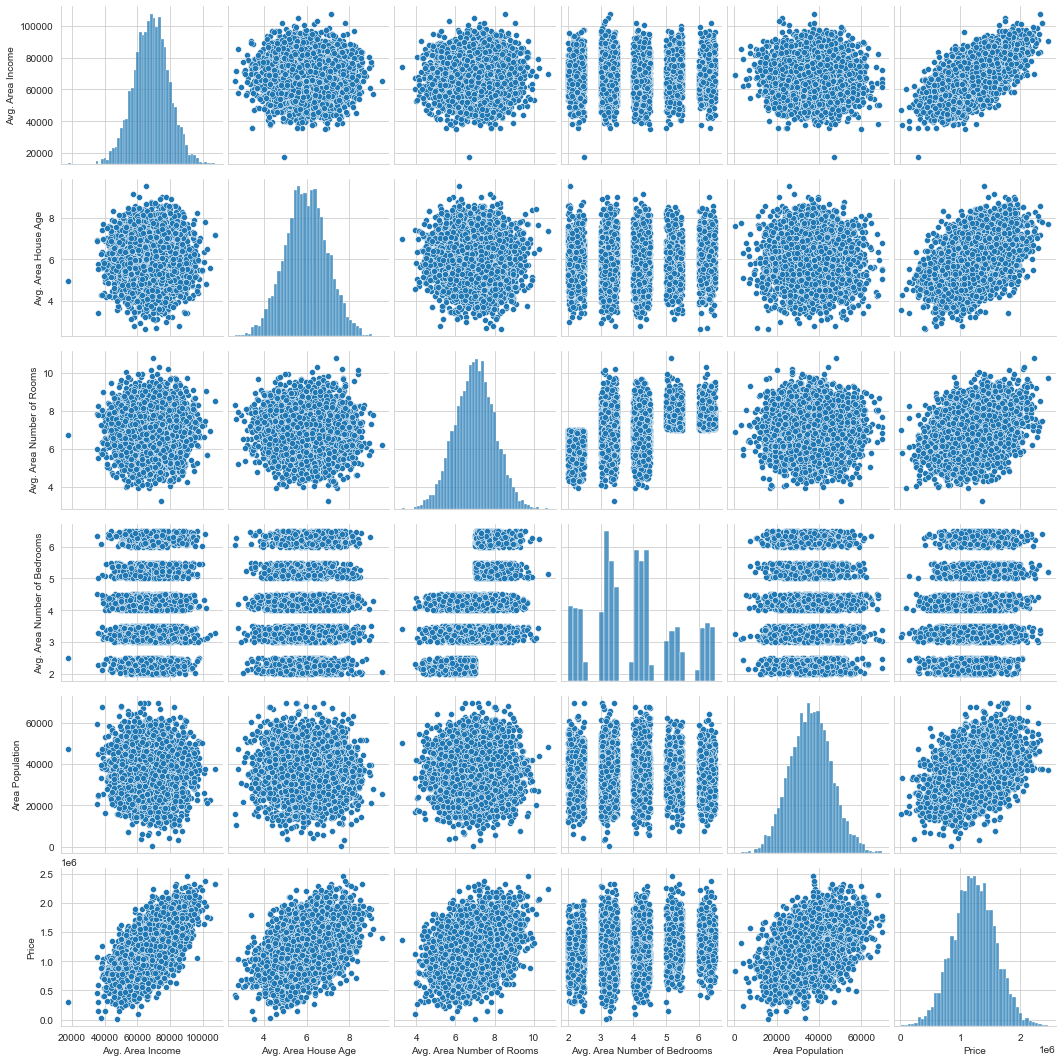

In [13]:
#To show all the pairs to analyse
sns.pairplot(houses)

<AxesSubplot:>

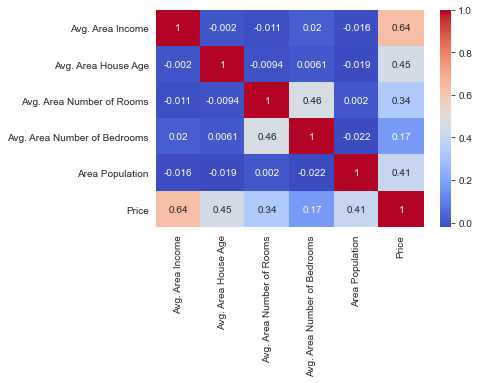

In [14]:
#checking for feature with most correlation with price using a matrix plot
sns.heatmap(houses.corr(), cmap='coolwarm', annot=True)

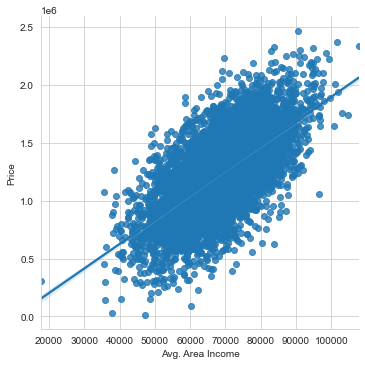

In [15]:
#creating a linear model plot to check relationship between "Avg. Area Income" and "price"
sns.lmplot(x='Avg. Area Income', y='Price', data=houses)

In [16]:
y = houses['Price']
#houses.drop(['Avg. Area Number of Rooms'], inplace=True, axis=1)

In [17]:
#houses.column[0:5]

In [18]:
houses['Avg. Area House Age'][houses['Avg. Area Number of Bedrooms'] == 4.09]

0       5.682861
55      5.949839
349     5.364982
741     6.954521
956     5.531124
971     7.762059
1123    4.312276
1139    6.304585
1152    8.465514
1280    4.675987
1350    5.272670
1388    5.409874
1619    4.019357
1945    7.030761
1983    5.489699
2239    5.854318
2243    6.207663
2302    7.325976
2700    7.286101
2827    6.103407
3121    6.594023
3171    6.069626
3329    7.105813
3542    4.214295
3866    7.759013
4027    4.173577
4068    5.312716
4231    6.658435
4492    5.443882
4725    6.168072
4890    6.903036
Name: Avg. Area House Age, dtype: float64

In [19]:
#houses[houses['Avg. Area Number of Bedrooms'] == 4.09]

In [20]:
#houses[houses['Price'] == 1.059034e+06]

In [21]:
#X = houses[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
#OR
X = houses.drop(['Price', 'Address'], axis=1)

In [22]:
houses.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [23]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [24]:
houses.iloc[4]

Avg. Area Income                                   59982.2
Avg. Area House Age                                5.04055
Avg. Area Number of Rooms                          7.83939
Avg. Area Number of Bedrooms                          4.23
Area Population                                    26354.1
Price                                               630943
Address                         USNS Raymond\nFPO AE 09386
Name: 4, dtype: object

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [26]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2654,86690.873301,6.259901,6.676265,3.23,42589.624391
2468,59866.947700,5.870330,5.899076,4.16,32064.597156
290,74372.138452,6.562380,8.184511,6.35,34321.960155
1463,61370.323490,6.529605,6.606744,4.30,20600.511000
4508,52652.652336,5.688943,7.217268,4.06,34776.585907
...,...,...,...,...,...
4171,56610.642563,4.846832,7.558137,3.29,25494.740298
599,70596.850945,6.548274,6.539986,3.10,51614.830136
1361,55621.899104,3.735942,6.868291,2.30,63184.613147
1547,63044.460096,5.935261,5.913454,4.10,32725.279544


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [28]:
lin_mod = LinearRegression()
svr_mod = SVR()

In [29]:
lin_mod.fit(X_train, y_train) #This plots the best line of fit

LinearRegression()

In [30]:
svr_mod.fit(X_train, y_train) #fitting the svr model

SVR()

In [31]:
print('Coefficients: \n', lin_mod.coef_)

Coefficients: 
 [2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
 1.52251955e+01]


In [32]:
print('Intercept: \n', lin_mod.intercept_)

Intercept: 
 -2641372.667301679


In [34]:
# Predict the test Data
predictions = lin_mod.predict(X_test)
pred = svr_mod.predict(X_test)

In [35]:
#X_test['Predicted_Price'] = predictions

In [36]:
#X_test['Actual_Price'] = y_test

In [37]:
#X_test.tail()

In [38]:
#sns.lmplot

In [35]:
pred = pd.DataFrame(X_test)
test = pd.concat([X_test, pred], axis = 1)

In [36]:
test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Predicted_Price,Actual_Price,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Predicted_Price,Actual_Price
1718,66774.995817,5.717143,7.795215,4.32,36788.980327,1.231694e+06,1.251689e+06,66774.995817,5.717143,7.795215,4.32,36788.980327,1.231694e+06,1.251689e+06
2511,62184.539375,4.925758,7.427689,6.22,26008.309124,1.231600e+06,8.730483e+05,62184.539375,4.925758,7.427689,6.22,26008.309124,1.231600e+06,8.730483e+05
345,73643.057298,6.766853,8.337085,3.34,43152.139577,1.231786e+06,1.696978e+06,73643.057298,6.766853,8.337085,3.34,43152.139577,1.231786e+06,1.696978e+06
2521,61909.041438,6.228343,6.593138,4.29,28953.925377,1.231612e+06,1.063964e+06,61909.041438,6.228343,6.593138,4.29,28953.925377,1.231612e+06,1.063964e+06
54,72942.705059,4.786222,7.319886,6.41,24377.909049,1.231681e+06,9.487883e+05,72942.705059,4.786222,7.319886,6.41,24377.909049,1.231681e+06,9.487883e+05


Text(0.5, 0, 'Y')

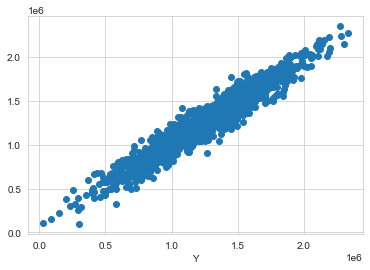

In [39]:
#Scatter plot for linear regression
plt.scatter(y_test, predictions)
plt.xlabel('Y')

Text(0.5, 0, 'Y')

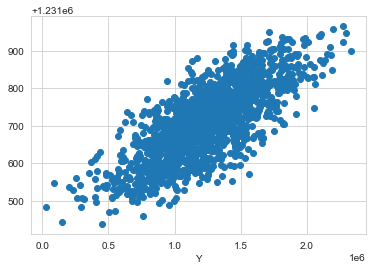

In [41]:
#scatter plot for SVR
plt.scatter(y_test, pred)
plt.xlabel('Y')

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81257.55795856068
MSE: 10169125565.897734
RMSE: 100842.08231635111


In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 281755.1452894974
MSE: 124821025325.2922
RMSE: 353300.1915160707
